In [1]:
import pandas as pd
reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
reviews.head()


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

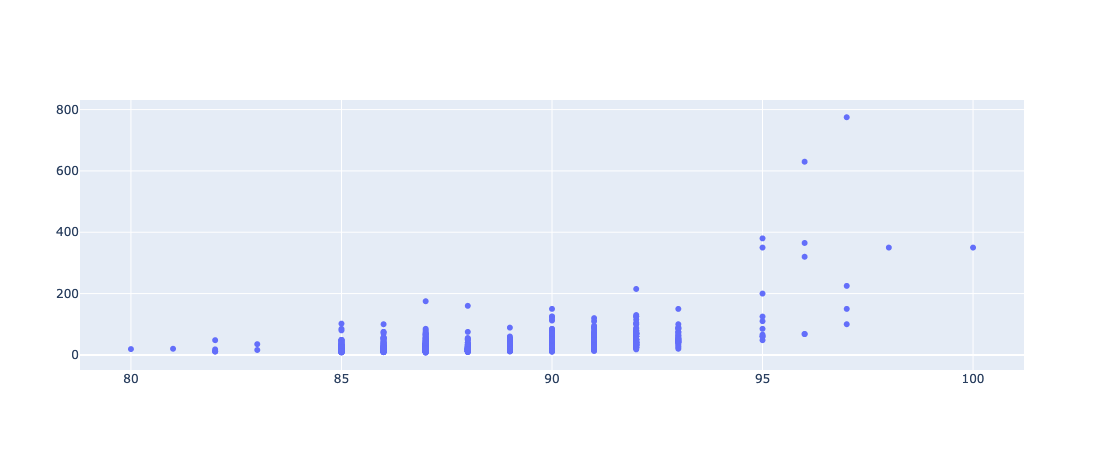

In [3]:
import plotly.graph_objs as go

iplot([go.Scatter(x=reviews.head(1000)['points'], y=reviews.head(1000)['price'], mode='markers')])


/Users/ryanferns/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




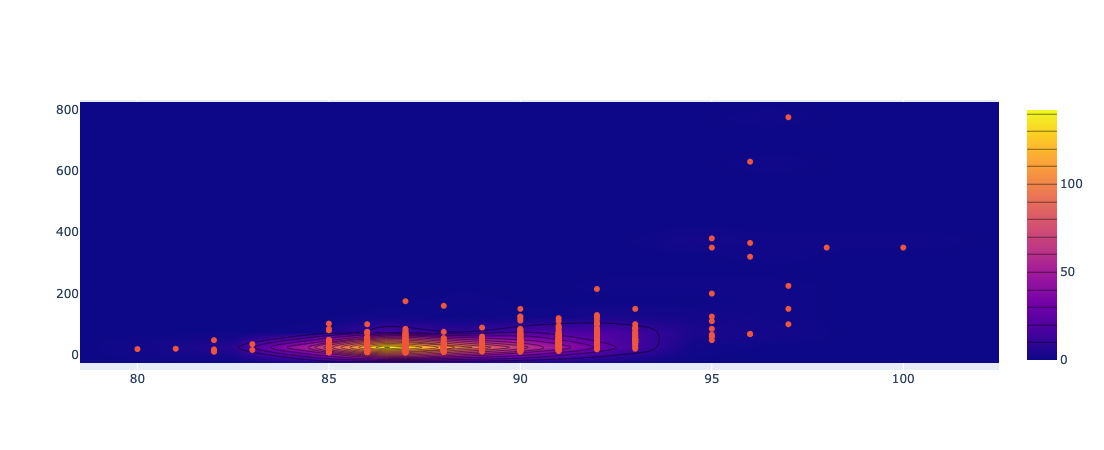

In [4]:
iplot([go.Histogram2dContour(x=reviews.head(500)['points'], 
                             y=reviews.head(500)['price'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=reviews.head(1000)['points'], y=reviews.head(1000)['price'], mode='markers')])

In [5]:
df = reviews.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()

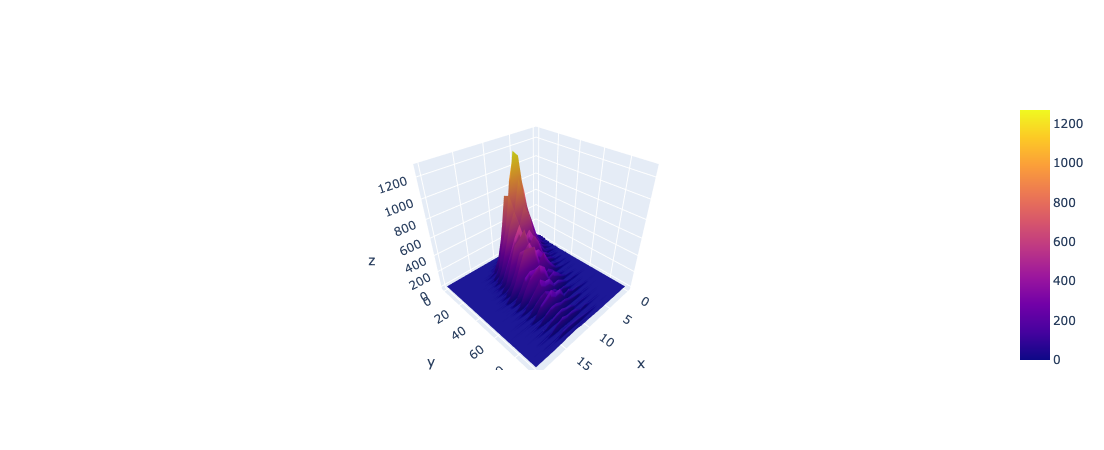

In [6]:
iplot([go.Surface(z=v)])

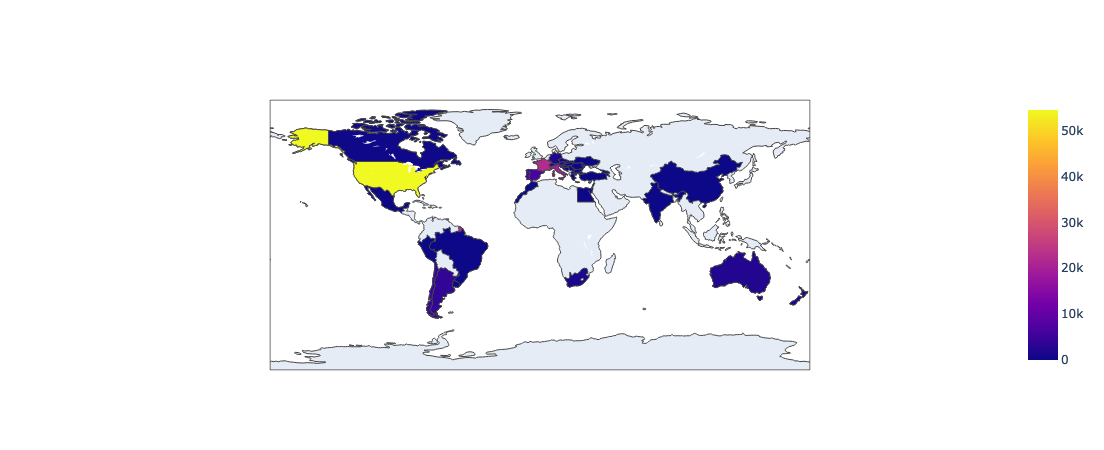

In [7]:
df = reviews['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

In [8]:
import pandas as pd
pokemon = pd.read_csv("Pokemon.csv")
pokemon.head(3)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [9]:
pokemon.shape

(800, 13)

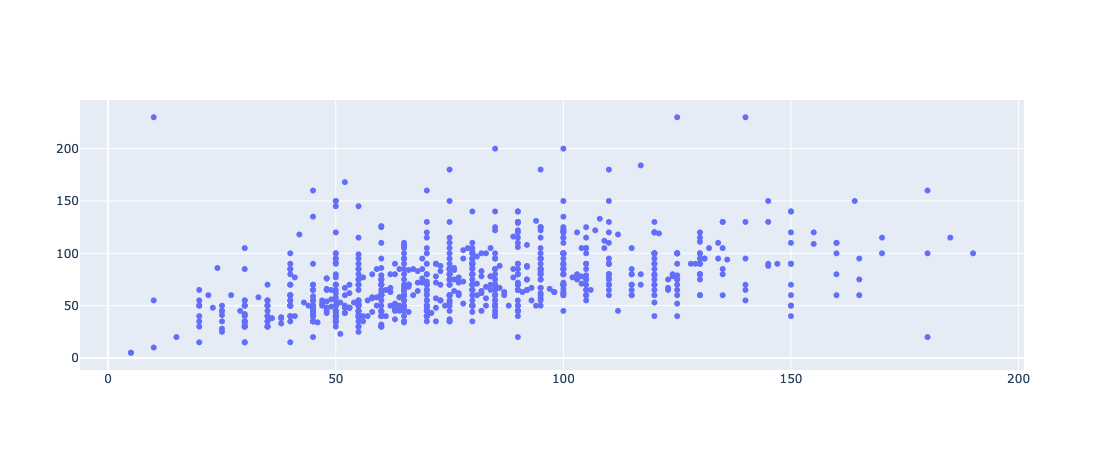

In [10]:
import plotly.graph_objs as go

iplot([go.Scatter(x=pokemon['Attack'], y=pokemon['Defense'], mode='markers')])